<a href="https://colab.research.google.com/github/jambinoid/convolution_networks/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика по сверткам 

## Математическое опредление

Сверточные нейросети так называются, потому что операция, которую они производят над входными данными, в математике называется свертка. Выглядит она вот так:

$$(f*g)(x) = \int \limits^{+\infty}_{-\infty} f(\tau)g(x - \tau) d\tau$$

Где f, g вредставляют собой функции от координат задающие ядро и саму картинку. Если быть точнее, то в случае нейросетей вместо интеграла будет обычная сумма, так как картинка и ядро заданы пикселями, а значит функции дискретные. 
(_на самом деле аналогия не совсем правильная, потому что свертки в нейросетях немного отличаются от математических сверток, но эти различия незначительные_)

**Фильтры**, которые применяются к картинке в сверточном слое, также называются **ядро** и **kernel**.
<img src="https://i.imgflip.com/2yq7h7.jpg" width=600>

# Задание 1

In [ ]:
img_url = 'https://cdn.pixabay.com/photo/2018/09/18/19/47/crocodile-3687036__480.jpg'

!wget $img_url

img_path = 'crocodile-3687036__480.jpg'

--2020-07-27 11:12:30--  https://cdn.pixabay.com/photo/2018/09/18/19/47/crocodile-3687036__480.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.20.183, 104.18.21.183, 2606:4700::6812:14b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.20.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97048 (95K) [image/jpeg]
Saving to: ‘crocodile-3687036__480.jpg’

crocodile-3687036__ 100%[===================>]  94.77K  --.-KB/s    in 0.01s   

2020-07-27 11:12:30 (7.41 MB/s) - ‘crocodile-3687036__480.jpg’ saved [97048/97048]



In [ ]:
!pip install imageio

import scipy.misc
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from imageio import imread
from ipywidgets import interact, FloatSlider

%matplotlib inline

def grayscale(img):
    #Один из примеров преведения картинки в ч/б - просто возьмем красный канал 
    return img[:, :, 0]

def show_img(img):
    #Красиво выводит картинку с помощью matplotlib
    plt.figure(figsize=(10, 6))
    if len(img.shape) == 2:
        plt.imshow(img, cmap=cm.Greys_r)
    else:
        plt.imshow(img)
    plt.axis('off')
    plt.show()
    
def seed_random(size, seed):
    np.random.seed(seed)
    return np.random.normal(size=size)

def load_img(img_path):
    return imread(img_path) / 255

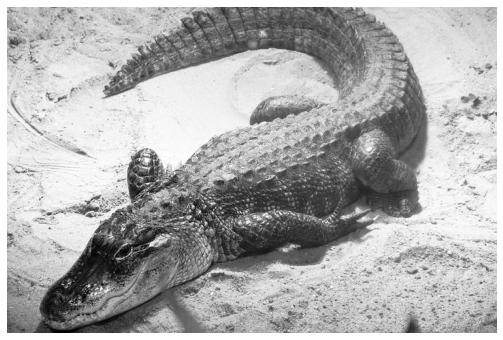

In [ ]:
# Загрузим картинку
gray_img = grayscale(load_img(img_path))
show_img(gray_img)

Вычисление свертки:

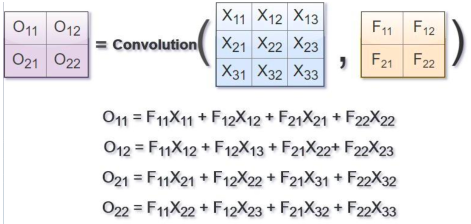

In [ ]:
 def convolve(img, kernel):
    """
    Эта функция будет принимать на вход массив с числами, характеризующими картинку 
    img.shape = (y, x), и kernel.shape = (y, x).
    Это самый простой вариант функции, которая работает только с серыми картинками (картинками с одним каналом).
    Свертка должна производиться без padding и stride, добавим их позже.
    Так как у нас один кернел, то и канал у выходной картинки будет один.
    Ничего кроме свертки проихводить не нужно, ни добавлять bias, ни применять функцию активации.
    """
    kernel_y, kernel_x = kernel.shape[:2]
    img_y, img_x = img.shape[:2]
    result = np.zeros((img_y - kernel_y + 1, img_x - kernel_x + 1))
    # поитерируемся по x и y
    for y in range(result.shape[0]):
        for x in range(result.shape[1]):
            result[y, x] = np.sum(np.multiply(img[y:y + kernel_y, x:x + kernel_x], kernel))
    """
    # вариант через генераторы списков, но он плохо читаемый и почти не дает выигрыша по времени :(
    result = np.array([
                       [np.sum(np.multiply(img[y:y + kernel_y, x:x + kernel_x], kernel)) for x in range(img_x - kernel_x + 1)]
                       for y in range(img_y - kernel_y + 1)
                       ])
    """
    
    return result

Подсказка: нужно использовать функцияю multiply() из numpy, которая вычисляет поэлементное произведение массивов и sum()

Теперь протестируем нашу свертку с фильтрами. Если ты последовал рекомендации и написал ее через вложенные for циклы, то работать будет долго, порядка 10 секунд. 

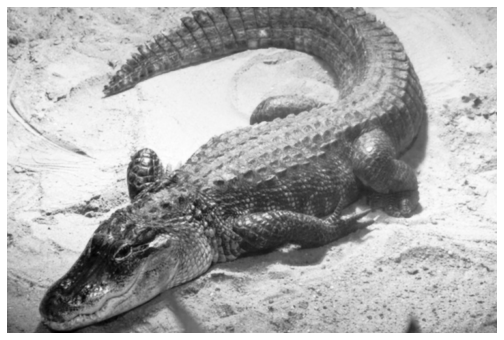

In [ ]:
# применим размывающий фильтр
blur_filter = np.array([[0.0625, 0.125, 0.0625],
                        [0.125, 0.25, 0.125],
                        [0.0625, 0.125, 0.0625]])

blured_img = convolve(gray_img, blur_filter).clip(0, 1)
show_img(blured_img)

На этом сайте https://setosa.io/ev/image-kernels/ можешь выгрузить картинку и сравнить результат

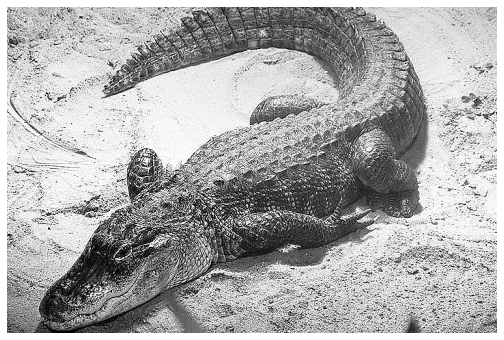

In [ ]:
# применим фильтр, увеличивающий резкость
sharpen_filter = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

sharpened_img = convolve(gray_img, sharpen_filter).clip(0, 1)
show_img(sharpened_img)

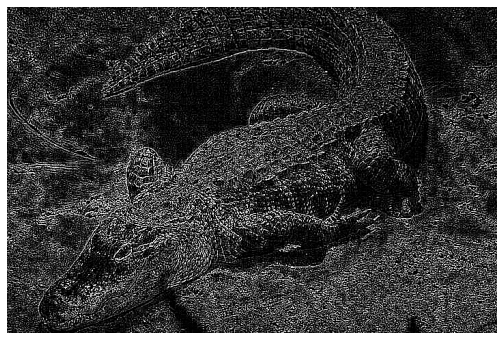

In [ ]:
# применим фильтр, оставляющий границы объектов
outline_filter = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])

outline_img = convolve(gray_img, outline_filter).clip(0, 1)
show_img(outline_img)

Надеюсь, что у тебя получилось и все работает, как надо с: 

In [ ]:
def my_operation(img, kernel):
    """
    Скопируй сюда реализацию свертки, которую сделали выше и замени сумму на произвдение.
    Это очень просто сделать, если свертка реализована как два вложенных цикла
    """
    kernel_y, kernel_x = kernel.shape[:2]
    img_y, img_x = img.shape[:2]
    result = np.zeros((img_y - kernel_y + 1, img_x - kernel_x + 1))

    
    kernel_y, kernel_x = kernel.shape[:2]
    img_y, img_x = img.shape[:2]
    result = np.zeros((img_y - kernel_y + 1, img_x - kernel_x + 1))
    # поитерируемся по x и y
    for y in range(result.shape[0]):
        for x in range(result.shape[1]):
            result[y, x] = np.prod(np.multiply(img[y:y + kernel_y, x:x + kernel_x], kernel))
    """
    # вариант через генераторы списков, но он плохо читаемый и почти не дает выигрыша по времени :(
    result = np.array([
                       [np.prod(np.multiply(img[y:y + kernel_y, x:x + kernel_x], kernel)) for x in range(img_x - kernel_x + 1)]
                       for y in range(img_y - kernel_y + 1)
                       ])
    """
    
    return result

In [ ]:
# применим новую свертку и возьмем сумму
filter = np.array([[0.0625, 0.125, 0.0625],
                   [0.125, 0.25, 0.125],
                   [0.0625, 0.125, 0.0625]])

result = my_operation(gray_img, filter)
print('Image size: {}'.format(gray_img.shape[:2]))
print('Kernel size: {}'.format(filter.shape[:2]))
print('Result size: {}'.format(result.shape[:2]))

Image size: (480, 720)
Kernel size: (3, 3)
Result size: (478, 718)


## Свертка для извлечения локальной информации

Сверточные слои намного лучше обрабатывают картинки, чем полносвязные. Причина в том, что сверточные слои эксплуатируют внешние знания о структуре данных:

* Пиксели находящиеся рядом намного сильнее связаны между собой, чем дальние.
* Мы можем сдвинуть объект на картинке и он останется собой.

Эти предположения можно переформулировать в более сжатом виде: в данных важна именно локальная структура. Такие жесткие ограничения позволяют сверточным слоям использовать намного меньше весов, применяя один и тот же небольшой фильтр ко всем частям картинки. Это, в свою очередь, упрощает обучение нейронной сети.

## Свертка для нахождения похожих паттернов

Давайте посмотрим на небольшую иллюстрацию того, как просчитывается свертка в одномерном случае

In [ ]:
def f(x):
    return 1/(2 + x**2 * (0.1 + np.sin(x)**2))


def g(x):
    return np.exp(-x**2/2) / np.sqrt(2 * np.pi)


x = np.linspace(-10, 10, 100)
@interact(g_offset=FloatSlider(min=-10, max=10, step=0.5))
def plot_and_calc(g_offset):
    plt.figure(figsize=(10, 7))
    f_val = f(x)
    g_val = g(g_offset - x)
    mul_vals = f_val * g_val

    plt.plot(x, f_val, label='f(x)')
    plt.plot(x, g_val, label='g(x)')
    plt.plot(x, mul_vals, label='f(x)*g(x)')
    plt.gca().fill_between(x, 0, mul_vals)
    plt.legend()

    plt.text(-10.5, 0.55,
             "Approximate conv value at {} = {:.2f}".format(g_offset, mul_vals.sum()))

interactive(children=(FloatSlider(value=0.0, description='g_offset', max=10.0, min=-10.0, step=0.5), Output())…

Перемещая ползунок, Вы видите как перемещается функция $g(x)$, задающая веса для аггрегирования. Значение свертки в точке, которую Вы задаете g_offset, равно площади под кривой $f(x)\cdot g(x)$.

Легко заметить, что чем лучше совпадают две функции, чем более они похожи, тем выше значение свертки. Максимум достигается при нулевом сдвиге $g(x)$, когда совпадают два толстых пика. Но большие значения получаются и при совпадении малых пиков с $g(x)$. 

**Посмотрев на значения свертки мы можем догадаться, где на функции $f(x)$ находятся пики.**

Использование свертки для нахождения каких-то особых частей в функции - одна из самых интересных трактовок с точки зрения Deep Learning. В случае картинок в качестве $f(x)$ выступает картинка, а в качестве $g(x)$ кернел, который мы перемещаем по картинке и ищем совпадения. Только кернелы не заданы заранее, а выучиваются самой нейронной сетью в зависимости от того, какие паттерны ей понадобятся. 

У хорошо обученных нейросетей на первом слое можно увижеть паттерны, которые они распознают: 
<img src="http://cs231n.github.io/assets/nn3/cnnweights.jpg" width=600>


# Задание 2

## Сверточный слой

Надеюсь, что уже понятно, что такое свертка и как она считается. Теперь перейдем к применению сверток в нейросетях. Для начала мы сами напишем свой сверточный слой. Вы уже писали свертку, но только для двумерной картинки,
пришло время понять, как это делать для батча картинок с несколькими фильтрами. **Так как теперь у нашей картинки есть несколько каналов, то и фильтры теперь имеют несколько каналов, по одному на каждый канал входной картинки, чтобы их все так же можно было накладывать друг на друга, поэлементно умножать и складывать.**

Сейчас предстоит написать ConvLayer(in_channels, out_channels, kernel_size). Я думаю, что лучше всего это получится сделать опираясь на иллюстрацию:

https://yapx.ru/v/ITdZG

In [ ]:
class ConvLayer:
    def __init__(self, in_channels, out_channels, kernel_size):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        
        # Теперь инициализируем массив с кернелами
        self.kernels = seed_random((out_channels, kernel_size, kernel_size, in_channels), 42)
        # Чтобы разобраться, что здесь написано, вспомним, что происзодит в сверточном слое.
        # 1) В сверточном слое применеяется несколько фильтров, каждый из них ищет в картинке какую-то особенность,
        # каждый фильтр производит свою двумерную картинку, состоящую из активаций. На иллюстрации, которая 
        # приложена выше это как раз можно наблюдать. После этого каждая карта активаций становится каналом
        # в новой катинке, которая и является выходом сети. Поэтому число фильтров равно числу выходных каналов.
        # 2) При этом каждый фильтр содержит несколько шаблонов размера kernel_size*kernel_size, чтобы 
        # собираться информацию с каждого из входных каналов. Количество таких двумерных шаблонов равно количеству
        # каналов во входной картинке. 
        self.biases = seed_random((out_channels), 13)
        
    def forward(self, X):       
        # Инициализируем массив с реузльтатом работы свертки
        res = np.zeros((X.shape[0], X.shape[1] - self.kernel_size + 1,
                        X.shape[2] - self.kernel_size + 1, self.out_channels))
        # используем четыре вложенных цикла, чтобы посчитать свертку. Сначала по картинкам в батче, потом по 
        # фильтрам, а потом по координатам. - то есть цикл состоит из 4 for 
        # !!!Не забудьте добавить bias!!!
        # применять функцию активации не нужно.
        for i, img in enumerate(X): # по картинкам в батче
            for kernel_id in range(self.out_channels):
                for y in range(res.shape[1]):
                    for x in range(res.shape[2]):
                        res[i, y, x, kernel_id] = np.sum(np.multiply(img[y:y + self.kernel_size, x:x + self.kernel_size, :],
                                                                    self.kernels[kernel_id])) + self.biases[kernel_id]
        
        return res

Чтобы протестировать свертку опять вернемся к картинке с крокодилом и попробуем сделать так, чтобы после применения фильтра резкости у нас получалась не серая картинка. Самый простой способ - применить фильтр отедеьно к каждому каналу. Для этого нужно сделать три кернела, каждый из которых работает только со своим каналом в исходной картинке.

In [ ]:
# Создадим наш слой
conv = ConvLayer(3, 3, 3)
r_filter = np.zeros((3, 3, 3))
r_filter[:, :, 0] = blur_filter

g_filter = np.zeros((3, 3, 3))
g_filter[:, :, 1] = blur_filter

b_filter = np.zeros((3, 3, 3))
b_filter[:, :, 2] = blur_filter
# Поставим в качестве кернелов фильтры, которые мы уже определили и применим к картинке
# Мы добавляем им новое измерение, чтобы их можно было применять к трехмерным картинкам
conv.kernels = np.array([r_filter, g_filter, b_filter])
conv.biases = np.zeros((3))

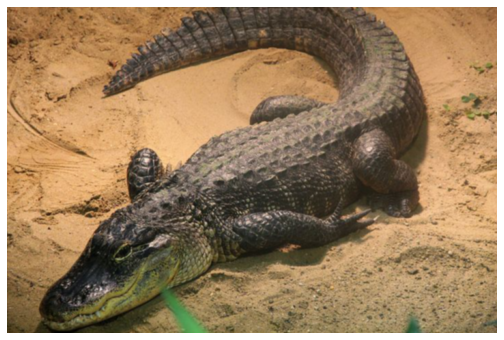

In [ ]:
img_path = 'crocodile-3687036__480.jpg'
img = load_img(img_path)
res = conv.forward(img[np.newaxis, :, :, :])
# Выведем размытую картинку
show_img((res[0]).clip(0, 1))

# Задание 3

А теперь протестируем, что правильно ли написали свертку и она хорошо работает. 

**!!!Как и в задании 1 скопируй весь код свертки в класс ниже и замените сумму на умножение. (сумму на умножение нужно менять только внутри подсчета кернела, bias все так же нужно добавлять)!!!**


In [ ]:
class ModifiedConvLayer:
    def __init__(self, in_channels, out_channels, kernel_size):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        
        # Теперь инициализируем массив с кернелами
        self.kernels =seed_random((out_channels, kernel_size, kernel_size, in_channels), 42)
        self.biases = seed_random((out_channels), 13)
        
    def forward(self, X):       
        # Инициализируем массив с реузльтатом работы свертки
        res = np.zeros((X.shape[0], X.shape[1] - self.kernel_size + 1,
                        X.shape[2] - self.kernel_size + 1, self.out_channels))
        # испоьзуем четыре вложенных цикла, чтобы посчитать свертку. Сначала по картинкам в батче, потом по 
        # фильтрам, а потом по координатам. Не забудь добавить bias!!!
        for i, img in enumerate(X): # по картинкам в батче
            for kernel_id in range(self.out_channels):
                for y in range(res.shape[1]):
                    for x in range(res.shape[2]):
                        res[i, y, x, kernel_id] = np.prod(np.multiply(img[y:y + self.kernel_size, x:x + self.kernel_size, :],
                                                                      self.kernels[kernel_id])) + self.biases[kernel_id]
        
        return res

**Создаем слой, применяющий модифицированную свертку с тремя фильтрами, применяем ее к картинке с крокодилом**

In [ ]:
# Создадим наш слой
conv2 = ModifiedConvLayer(3, 3, 3)
r_filter = np.zeros((3, 3, 3))
r_filter[:, :, 0] = blur_filter

g_filter = np.zeros((3, 3, 3))
g_filter[:, :, 1] = blur_filter

b_filter = np.zeros((3, 3, 3))
b_filter[:, :, 2] = blur_filter
# Поставим в качестве кернелов фильтры, которые мы уже определили и применим к картинке
# Мы добавляем им новое измерение, чтобы их можно было применять к трехмерным картинкам
conv.kernels = np.array([r_filter, g_filter, b_filter])
conv.biases = np.zeros((3))

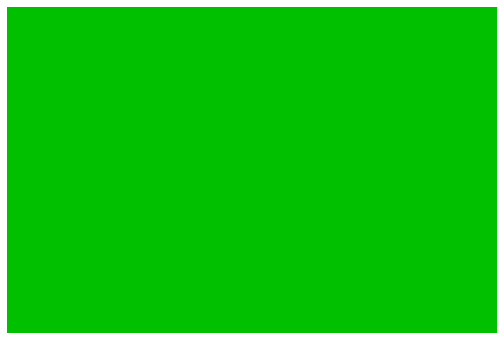

-1073.323054556045

In [ ]:
img_path = 'crocodile-3687036__480.jpg'
img = load_img(img_path)
res = conv2.forward(img[np.newaxis, :, :, :])

show_img(res[0].clip(0, 1))

res[0].sum() # сумма всех чисел в выходе


## Pytorch Convolutions

### Реализации сверток
Мы уже достаточно много поработали со сверткой, реализованной на for циклах, и увидели, что она работает слишком долго. Обработка одной кратинки среднего размера занимает около 10 секунд, что непозволительно долго. В реальном мире свертки реализованы с помощью продвинутых алгоритмов. 

Для маленьких размеров фильтров обычно используется метод, в котором свертка заменяется на одно матричное умножение. Это можно сделать, потому что на свертку можно смотреть как на полносвязный слой с некоторыми ограничениями.


### PyTorch

Хорошая новость заключается в том, что в PyTorch уже есть быстрые свертки и нам не придется писать их самим. 

Давайте потренируемся писать сверточные нейросети в PyTorch.

# Задание 4 и 5

**4. В этом задании мы хотим выбрать лучшую модель для работы с cifar10. Ниже будет несколько возможных архитектур, реализуйте их, потренируйте по 3 эпохи и выберите ту, которая в конце обучения достигает наименьшего лосса на тренировочном датасете (имеется в виду последний выведенный функцией train лосс)**

**5. Ответом на задание 5 является лосс на !!!тестовом!!! датасете модели, которую Вы выбрали в задании 4. (средений лосс по кртинке, который выводит print_test_loss)**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import torchvision
from torchvision import transforms
from tqdm import tqdm_notebook

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def print_test_loss(net):
    # выбираем функцию потерь
    loss_fn = torch.nn.CrossEntropyLoss()
    
    running_loss = 0.0
    with torch.no_grad():
        for batch in tqdm_notebook(testloader):
            # так получаем текущий батч
            X_batch, y_batch = batch

            # forward
            y_pred = net(X_batch)

            # loss calc
            loss = loss_fn(y_pred, y_batch)

            # добавляем лосс
            running_loss += loss
    print("Test Loss: {}".format(running_loss / len(testloader)))
    
def train(net):
    # выбираем функцию потерь
    loss_fn = torch.nn.CrossEntropyLoss()

    # выбираем алгоритм оптимизации и learning_rate
    learning_rate = 1e-4
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

    # итерируемся
    for epoch in tqdm_notebook(range(3)):
        running_loss = 0.0
        for i, batch in enumerate(tqdm_notebook(trainloader)):
            # так получаем текущий батч
            X_batch, y_batch = batch

            # обнуляем градиент
            optimizer.zero_grad()

            # forward
            y_pred = net(X_batch)
            
            # находим ошибку
            loss = loss_fn(y_pred, y_batch)

            # backward
            loss.backward()

            #optimize
            optimizer.step()

            # добавим лосc
            running_loss += loss

            # выведем качество каждые 2000 батчей
            if i % 2000 == 1999:
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0

    print('Обучение закончено')
    return net

# Простые архитектуры

**!!!ВАЖНО, Чтобы добиться воспроизводимости результатов, вставьте перед кажджым объявлением слоя
torch.manual_seed(0) + запукайте код в колабе + не используйте GPU!!!**

#### Архитектура 1:
Активация - ReLu
1. Conv(in_channels=3, out_channels=6, kernel_size=5)
2. MaxPool(kernel_size=2, stride=2)
3. Conv(in_channels=6, out_channels=16, kernel_size=5)
4. MaxPool(kernel_size=2, stride=2)
4. Linear(output=120)
5. Linear(output=84)
6. Linear(output=10)

In [ ]:
class SimpleConvNet1(nn.Module):
    def __init__(self):
        # вызов конструктора предка
        super(SimpleConvNet1, self).__init__()
        # необходимо заранее знать, сколько каналов у картинки (сейчас = 1),
        # которую будем подавать в сеть, больше ничего
        # про входящие картинки знать не нужно
        torch.manual_seed(0)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        torch.manual_seed(0)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        torch.manual_seed(0)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        torch.manual_seed(0)
        self.linear1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
        torch.manual_seed(0)
        self.linear2 = nn.Linear(in_features=120, out_features=84)
        torch.manual_seed(0)
        self.linear3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))

        x = self.pool(F.relu(self.conv2(x)))
        
        x = x.view(-1, 16 * 5 * 5)

        x = F.relu(self.linear1(x))

        x = F.relu(self.linear2(x))

        x = self.linear3(x)

        return x

In [ ]:
net1 = train(SimpleConvNet1())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


[1,  2000] loss: 2.040
[1,  4000] loss: 1.835
[1,  6000] loss: 1.756
[1,  8000] loss: 1.684
[1, 10000] loss: 1.650
[1, 12000] loss: 1.637



[2,  2000] loss: 1.580
[2,  4000] loss: 1.544
[2,  6000] loss: 1.518
[2,  8000] loss: 1.511
[2, 10000] loss: 1.480
[2, 12000] loss: 1.479



[3,  2000] loss: 1.441
[3,  4000] loss: 1.436
[3,  6000] loss: 1.426
[3,  8000] loss: 1.406
[3, 10000] loss: 1.411
[3, 12000] loss: 1.371


Обучение закончено


In [ ]:
print_test_loss(net1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys



Test Loss: 1.3903354406356812


**!!!ВАЖНО, Чтобы добиться воспроизводимости результатов, вставьте перед кажджым объявлением слоя
torch.manual_seed(0)!!!**


#### Архитектура 2:
В этой архитектуре мы немного поэкспериментируем и используем необычные вещи, а именно активацию tanh и вместо MaxPooling используем AveragePooling.

Активация - tanh
1. Conv(in_channels=3, out_channels=6, kernel_size=5)
2. AvgPool(kernel_size=2, stride=2)
3. Conv(in_channels=6, out_channels=16, kernel_size=5)
4. AvgPool(kernel_size=2, stride=2)
4. Linear(output=120)
5. Linear(output=84)
6. Linear(output=10)

In [ ]:
class SimpleConvNet2(nn.Module):
    def __init__(self):
        # вызов конструктора предка
        super(SimpleConvNet2, self).__init__()
        # необходимо заранее знать, сколько каналов у картинки (сейчас = 1),
        # которую будем подавать в сеть, больше ничего
        # про входящие картинки знать не нужно
        torch.manual_seed(0)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        torch.manual_seed(0)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        torch.manual_seed(0)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        torch.manual_seed(0)
        self.linear1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
        torch.manual_seed(0)
        self.linear2 = nn.Linear(in_features=120, out_features=84)
        torch.manual_seed(0)
        self.linear3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        x = self.pool(F.tanh(self.conv1(x)))

        x = self.pool(F.tanh(self.conv2(x)))
        
        x = x.view(-1, 16 * 5 * 5)

        x = F.tanh(self.linear1(x))

        x = F.tanh(self.linear2(x))

        x = self.linear3(x)

        return x

In [ ]:
net2 = train(SimpleConvNet2())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


[1,  2000] loss: 2.007
[1,  4000] loss: 1.864
[1,  6000] loss: 1.816
[1,  8000] loss: 1.782
[1, 10000] loss: 1.745
[1, 12000] loss: 1.734



[2,  2000] loss: 1.687
[2,  4000] loss: 1.654
[2,  6000] loss: 1.640
[2,  8000] loss: 1.633
[2, 10000] loss: 1.595
[2, 12000] loss: 1.592



[3,  2000] loss: 1.549
[3,  4000] loss: 1.534
[3,  6000] loss: 1.528
[3,  8000] loss: 1.515
[3, 10000] loss: 1.498
[3, 12000] loss: 1.464


Обучение закончено


In [ ]:
print_test_loss(net2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Test Loss: 1.4682419300079346


# Более сложные архитектуры

**!!!ВАЖНО, Чтобы добиться воспроизводимости результатов, вставьте перед кажджым объявлением слоя
torch.manual_seed(0)!!!**

#### Архитектура 3:
А здесь мы добавим еще сверточных слоев и уберем один полносвязный!

Активация - ReLu
1. Conv(in_channels=3, out_channels=64, kernel_size=3)
* Conv(in_channels=64, out_channels=64, kernel_size=3)
* MaxPool(kernel_size=2, stride=2)
* Conv(in_channels=64, out_channels=64, kernel_size=3)
* Conv(in_channels=64, out_channels=64, kernel_size=3)
* MaxPool(kernel_size=2, stride=2)
* Linear(output=60)
* Linear(output=10)

In [ ]:
class SimpleConvNet3(nn.Module):
    def __init__(self):
        # вызов конструктора предка
        super(SimpleConvNet3, self).__init__()
        # необходмо заранее знать, сколько каналов у картинки (сейчас = 1),
        # которую будем подавать в сеть, больше ничего
        # про входящие картинки знать не нужно
        torch.manual_seed(0)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3)
        torch.manual_seed(0)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        torch.manual_seed(0)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        torch.manual_seed(0)
        self.linear1 = nn.Linear(in_features=64 * 5 * 5, out_features=60)
        torch.manual_seed(0)
        self.linear2 = nn.Linear(in_features=60, out_features=10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        
        x = F.relu(self.conv2(x))
        x = self.pool(F.relu(self.conv2(x)))
        
        x = x.view(-1, 64 * 5 * 5)

        x = self.linear1(x)
        x = F.relu(x)

        x = self.linear2(x)

        return x

In [ ]:
net3 = train(SimpleConvNet3())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


[1,  2000] loss: 1.979
[1,  4000] loss: 1.683
[1,  6000] loss: 1.557
[1,  8000] loss: 1.458
[1, 10000] loss: 1.434
[1, 12000] loss: 1.398



[2,  2000] loss: 1.315
[2,  4000] loss: 1.304
[2,  6000] loss: 1.302
[2,  8000] loss: 1.256
[2, 10000] loss: 1.238
[2, 12000] loss: 1.212



[3,  2000] loss: 1.148
[3,  4000] loss: 1.131
[3,  6000] loss: 1.120
[3,  8000] loss: 1.102
[3, 10000] loss: 1.100
[3, 12000] loss: 1.053


Обучение закончено


In [ ]:
print_test_loss(net3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys



Test Loss: 1.0805920362472534


**!!!ВАЖНО, Чтобы добиться воспроизводимости результатов, вставьте перед кажджым объявлением слоя
torch.manual_seed(0)!!!**

#### Архитектура 4:
А что если мы пойдем еще глубже!!! (Осторожнее, тренироваться будет час, поэтому обновите подключение к ноутбуку, прежде чем запускать ячейку, иначе может быть таймаут)


Активация ReLu
1. Conv(in_channels=3, out_channels=64, kernel_size=3)
* Conv(in_channels=64, out_channels=64, kernel_size=3)
1. Conv(in_channels=64, out_channels=64, kernel_size=3)
* Conv(in_channels=64, out_channels=64, kernel_size=3)
* MaxPool(kernel_size=2, stride=2)
* Conv(in_channels=64, out_channels=128, kernel_size=3)
* Conv(in_channels=128, out_channels=128, kernel_size=3)
1. Conv(in_channels=128, out_channels=128, kernel_size=3)
* Conv(in_channels=128, out_channels=128, kernel_size=3)
* MaxPool(kernel_size=2, stride=2)
* Linear(output=10)

In [ ]:
class SimpleConvNet4(nn.Module):
    def __init__(self):
        # вызов конструктора предка
        super(SimpleConvNet4, self).__init__()
        # которую будем подавать в сеть, больше ничего
        # про входящие картинки знать не нужно
        torch.manual_seed(0)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3)
        torch.manual_seed(0)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        torch.manual_seed(0)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        torch.manual_seed(0)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        torch.manual_seed(0)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3)
        torch.manual_seed(0)
        self.linear = nn.Linear(in_features=128 * 2 * 2, out_features=10)

    def forward(self, x):
        x = F.relu(self.conv2(F.relu(self.conv1(x))))
        x = self.pool(F.relu(self.conv2(F.relu(self.conv2(x)))))
        x = F.relu(self.conv4(F.relu(self.conv3(x))))
        x = self.pool(F.relu(self.conv4(F.relu(self.conv4(x)))))
        
        x = x.view(-1, 128 * 2 * 2)

        x = self.linear(x)

        return x

In [ ]:
net4 = train(SimpleConvNet4())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


[1,  2000] loss: 2.080
[1,  4000] loss: 1.844
[1,  6000] loss: 1.717
[1,  8000] loss: 1.607
[1, 10000] loss: 1.538
[1, 12000] loss: 1.489



[2,  2000] loss: 1.399
[2,  4000] loss: 1.379
[2,  6000] loss: 1.331
[2,  8000] loss: 1.299
[2, 10000] loss: 1.287
[2, 12000] loss: 1.251



[3,  2000] loss: 1.197
[3,  4000] loss: 1.154
[3,  6000] loss: 1.155
[3,  8000] loss: 1.129
[3, 10000] loss: 1.125
[3, 12000] loss: 1.083


Обучение закончено


In [ ]:
print_test_loss(net4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys



Test Loss: 1.0712536573410034


In [ ]:
### p.s. чтобы получить правильные ответы, нужно запустить все задания в Google Colab

Если опираться на последнюю выведенную ошибку на тренировочных данных получаем, что лучше использовать третью модель. Серднее значение функции потерь для нее на тестовых данных составляет 1.0805920362472534.

(Но если опираться на ошибку на тестовых данных, то лучше выбрать четвертую модель. Для нее среднее значение функции потерь на тестовых данных составляет 1.0712536573410034)